# Лабораторная №5

1.	Изучите материал, представленный в разделе Ход работы .
2.	 Подключите датасеты моделей регрессии:

| ToDo | Description |
|:-----:|:-----:|
| load_diabetes(*[, return_X_y, as_frame]) | Загрузите и верните набор данных диабета (регрессия). |
| load_linnerud(*[, return_X_y, as_frame]) | Загрузите и верните набор данных linnerud физических упражнений. |

3.	Изучите подключенные данные.
4.	Постройте модели регрессии (KNeighborsRegressor, LinearRegression, Ridge, Lasso, LogisticRegression) для полученных датасетов, описанные в Ходе работы.
*	Настройте наилучшие параметры моделей.
*	Сравните результаты и сделайте выводы.
5.	Оформите Notebook.
6.	Оформите выводы по работе.


In [7]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import mglearn, mglearn.datasets

### Подключение датасетов моделей регрессии и изучение подключенных данных

In [8]:
from sklearn.datasets import load_diabetes, load_linnerud

#### Датасет **diabets**

In [37]:
diabetes_data = load_diabetes(as_frame=True)
diabetes = load_diabetes()

X = diabetes_data.data #признаки
y = diabetes_data.target #цел. переменная

print("Признаки (X):")
print(X.head())
print("==="*20)

print("\nЦелевая переменная (y):")
print(y.head())

Признаки (X):
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Целевая переменная (y):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [27]:
print("\nОписание набора данных Diabetes:\n", diabetes_data.DESCR)


Описание набора данных Diabetes:
 .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of 

In [38]:
print(f'Keys of diabets:\n{diabetes.keys()}')

Keys of diabets:
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [39]:
print("Форма массива data для набора diabets: \n{}".format(diabetes.data.shape))

Форма массива data для набора diabets: 
(442, 10)


In [41]:
print(f'Имена признаков:\n{diabetes.feature_names}')

Имена признаков:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


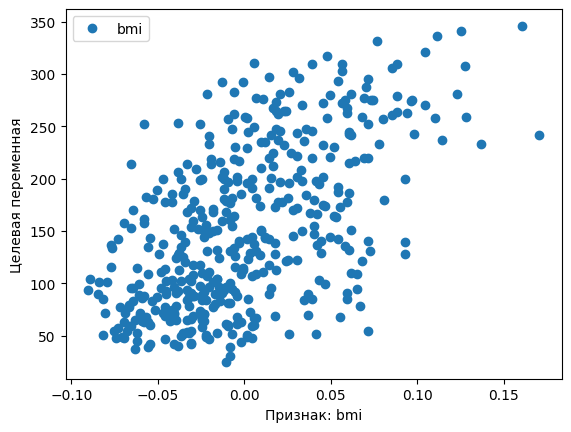

In [21]:
# plt.plot(X, y, 'o')
# plt.xlabel("Признак")
# plt.ylabel("Целевая переменная")
# plt.legend()
# plt.show()
plt.plot(X.iloc[:, 2], y, 'o', label=X.columns[2])  # 3rd признак
plt.xlabel("Признак: " + X.columns[2])
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()

#### Датасет **linnerud**

In [49]:
linnerud_data = load_linnerud(as_frame=True)
linnerud = load_linnerud()

X = linnerud_data.data #признаки
y = linnerud_data.target #цел. переменная

print("Признаки (X):")
print(X.head())

print("\nЦелевая переменная (y):")
print(y.head())

Признаки (X):
   Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0

Целевая переменная (y):
   Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0


In [51]:
print("\nОписание набора данных Linnerud:\n", linnerud_data.DESCR)


Описание набора данных Linnerud:
 .. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

:Number of Instances: 20
:Number of Attributes: 3
:Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. dropdown:: References

   * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
     Editions Technic.



In [50]:
print(f'Keys of diabets:\n{linnerud.keys()}')
print("==="*10)
print("Форма массива data для набора linnerud: \n{}".format(linnerud.data.shape))
print("==="*10)
print(f'Имена признаков:\n{linnerud.feature_names}')

Keys of diabets:
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])
Форма массива data для набора linnerud: 
(20, 3)
Имена признаков:
['Chins', 'Situps', 'Jumps']


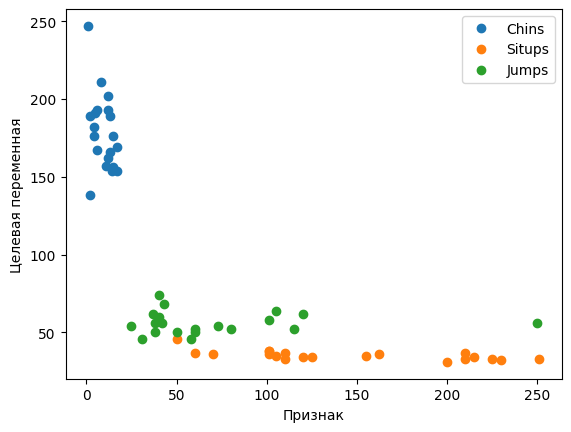

In [53]:
plt.plot(X, y, 'o', label = X.columns[::])
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.legend()
plt.show()

### Построение модели регресии

#### KNeighborsRegressor

#### LinearRegression

#### Ridge

#### Lasso

#### LogisticRegression